# __EXPLORATORY DATA ANALYSIS ON COURSERA COURSES IN 2020__


In [46]:
# COURSERA 2020 COURSES EXPLORATORY DATA ANALYSIS
# ----------------------------------------------------------------------------------------------------------------


# INITIATION ------------

# System information
import os

# Data preparation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import skimage as ski
import seaborn as sns
from tabulate import tabulate

# Data transformation & algorithms
import numpy as np
import scipy as sp

# Miscellaneous
import math


print(
    'CURRENT DIRECTORY:\n'
    '. = \"', os.getcwd(), '\"', sep=''
)

for dirName, _, filenames in os.walk('.'):
    if dirName[2:3] != '.':
        print('\n', dirName, sep='')
        for filename in filenames:
            print(os.path.join(dirName, filename))


CURRENT DIRECTORY:
. = "G:\My Drive\Codes\.Projects\DS\Turing\1 Data Wrangling with Python\S3\Project"

.
.\EDA_CourseraCourses.ipynb

.\data
.\data\coursera_courses.csv


## Familiarization with the Data

The first step in our data analysis is to import the dataset and familiarize ourselves with its structure and
features. The dataset scrapped from Coursera website contains information about various aspects of the popular
courses that have been published on Coursera up until 2020.

I will use the pandas library to load the data into a DataFrame and explore its shape, columns, and summary
statistics. This will help us identify any potential issues with the data quality, such as missing values, outliers, or incorrect formats. We will also visualize some key variables using matplotlib and seaborn to gain insights into the distribution and relationships of the data.


In [47]:
# EXECUTION -------------

# Convert dataset into dataframe
DATA = pd.read_csv(
    '.\data\coursera_courses.csv',
    index_col='Unnamed: 0'
)

# Format indices & rearrange the rows
DATA.index.name = 'ID'
DATA = DATA.sort_index()

# Format columns' titles
DATA.columns = DATA.columns.map(lambda name: ' '.join(map(lambda word: word.title(), name.split('_')[1:])))
DATA = DATA.rename(columns={'Students Enrolled': 'Enrolment'})

# Flag to indicate dataset has not been processed
preprocessed = False

# First 10 observations
DATA.head(10)


,Title,Organization,Certificate Type,Rating,Difficulty,Enrolment
ID,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
7,Business Foundations,University of Pennsylvania,SPECIALIZATION,4.7,Beginner,510k
8,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220k


In [48]:
# Improve Dataset's Readability & Reformat Numerical & Categorical Data
if not preprocessed:
    ##
    print(
    "Number of different abbreviations in 'Number of Enrolment' data:",
    ', '.join(DATA['Enrolment'].str[-1].unique()),
    end='.\n'
)

    DATA['Enrolment'] = \
        DATA['Enrolment'].str[:-1].astype(float)*\
        DATA['Enrolment'].str[-1].map(lambda abbr: 1 if abbr=='k' else 1000)

    ##
    DATA['Certificate Type'] = DATA['Certificate Type'].str.title()

print('# Enrolment is changed to numerical values.')
preprocessed = True


Number of different abbreviations in 'Number of Enrolment' data: k, m.
# Enrolment is changed to numerical values.


In [49]:
# Number of observations and features
print(f"Number of Observations: {DATA.shape[0]}; \n"
      f"Number of Features: {DATA.shape[1]}.")

## List of the names of columns with quantitative data
columns_names = DATA.select_dtypes(include='object').columns.tolist()
## List of the names of columns with quantitative data
columns_numeric = DATA.select_dtypes(include=('float64', 'int64', 'int', 'float')).columns.tolist()

print(f"- Categorical features: {', '.join(columns_names)}; \n"
      f"- Numerical features: {', '.join(columns_numeric)}.")

DATA.head(10)


Number of Observations: 891; 
Number of Features: 6.
- Categorical features: Title, Organization, Certificate Type, Difficulty; 
- Numerical features: Rating, Enrolment.


,Title,Organization,Certificate Type,Rating,Difficulty,Enrolment
ID,,,,,,
0,IBM Data Science,IBM,Professional Certificate,4.6,Beginner,480.0
1,Introduction to Data Science,IBM,Specialization,4.6,Beginner,310.0
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500.0
3,Python for Everybody,University of Michigan,Specialization,4.8,Beginner,1500.0
4,Google IT Support,Google,Professional Certificate,4.8,Beginner,350.0
5,Deep Learning,deeplearning.ai,Specialization,4.8,Intermediate,690.0
6,Machine Learning,Stanford University,Course,4.9,Mixed,3200.0
7,Business Foundations,University of Pennsylvania,Specialization,4.7,Beginner,510.0
8,Applied Data Science,IBM,Specialization,4.6,Beginner,220.0


In [50]:
# Descriptive statistics of the data
DATA.describe().T


,count,mean,std,min,25%,50%,75%,max
Rating,891.0,4.677329,0.162225,3.3,4.6,4.7,4.8,5.0
Enrolment,891.0,90.552076,181.936454,1.5,17.5,42.0,99.5,3200.0


<Axes: xlabel='Rating', ylabel='Enrolment'>

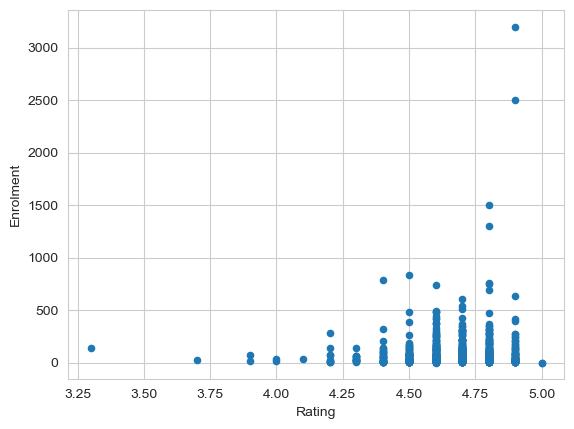

In [51]:
%matplotlib inline

DATA.plot.scatter(x='Rating', y='Enrolment')

Difficulty
Advanced        Axes(0.125,0.11;0.775x0.77)
Beginner        Axes(0.125,0.11;0.775x0.77)
Intermediate    Axes(0.125,0.11;0.775x0.77)
Mixed           Axes(0.125,0.11;0.775x0.77)
Name: Enrolment, dtype: object

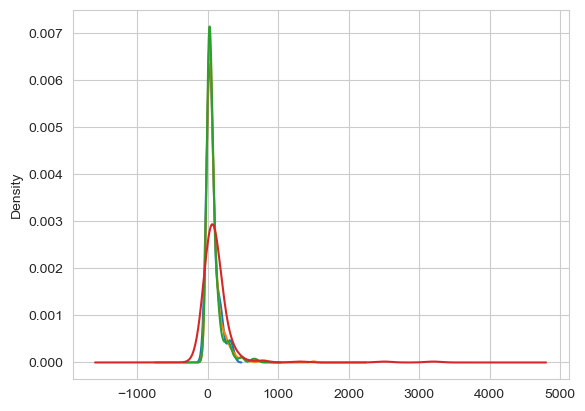

In [52]:
DATA.groupby('Difficulty')['Enrolment'].plot.kde()  # 3

Difficulty
Advanced        Axes(0.125,0.11;0.775x0.77)
Beginner        Axes(0.125,0.11;0.775x0.77)
Intermediate    Axes(0.125,0.11;0.775x0.77)
Mixed           Axes(0.125,0.11;0.775x0.77)
Name: Rating, dtype: object

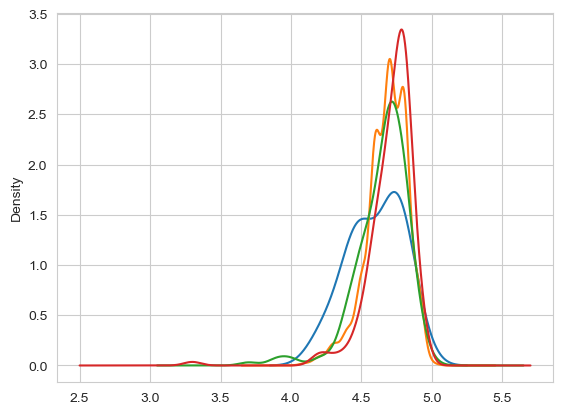

In [53]:
DATA.groupby('Difficulty')['Rating'].plot.kde()  # 4

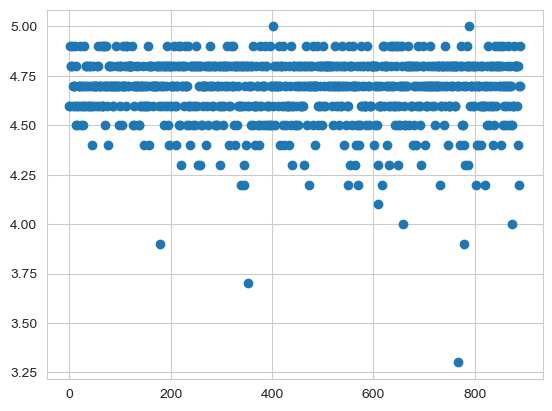

In [54]:
plt.scatter(DATA.index, DATA['Rating'])

## Data Cleaning
Before analyzing the Coursera dataset, some data cleaning steps will be performed to ensure the quality and
validity of the data. In this section, we will describe the data cleaning process that we applied to the Coursera dataset.



First, any observations with erroneous values that are in unsuitable formats or missing values will be handled.

In [55]:
# HANDLING ERRONEOUS VALUES

# Analyze possible invalid data
rows_NaN = DATA.isnull().any(axis=1)

if rows_NaN.any():  # check if any observations have unrepresentable values
    print('Invalid observations:\n', DATA[rows_NaN])

else:
    print('Invalid values not found.')

# Analyze possible missing data
rows_NA = DATA.isna().any(axis=1)

if rows_NA.any():  # check if any observations have missing values
    print('Observations with missing values:\n', DATA[rows_NA])

else:
    print('Missing values not found.')

# Cleaning the dataset
## Observations with erroneous non-numeric data such as Title, Organization, Certificate Type, and Difficulty are
# removed;
DATA.dropna(subset='Title, Organization, Certificate Type, Difficulty'.split(', '), inplace=True)
## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
DATA.fillna(DATA.median(numeric_only=True, skipna=True), inplace=True)


print('\n# Dataset no longer contains unrepresentable or missing data.')


Invalid values not found.
Missing values not found.

# Dataset no longer contains unrepresentable or missing data.


Second, any duplicate samples and features based on IDs and names will be investigated further from the dataset to understand the reasons behind these duplicates and to avoid redundancy and bias.

In [56]:
# REMOVING DUPLICATE SAMPLES & FEATURES

# Remove duplicated IDs
ids_unique = DATA.index.unique()
ids_duplicated = DATA.index[DATA.index.duplicated()]

if ids_unique.size != DATA.shape[0]:
    print('Duplicated IDs found.')
    print('- No. Unique IDs:', ids_unique.size)
    print('- Duplicated IDs:', ', '.join(ids_duplicated))

    DATA = DATA[~ids_duplicated]

else:
    print('Duplicated IDs not found.')


Duplicated IDs not found.


In [57]:
# Investigate duplicated titles
titles_unique = DATA['Title'].unique()
courses_duplicated = DATA['Title'][DATA['Title'].duplicated()]

if titles_unique.size != DATA.shape[0]:
    print('Duplicated courses found.')
    print('- No. Unique Courses:', titles_unique.size)
    print(
        '- Duplicated Courses:',
        ''.join(map(
            lambda i, title: f'\n    {i}. {title}',
            range(1, courses_duplicated.size + 1),
            courses_duplicated
        ))
    )

    # DATA.drop_duplicates(subset='Title', inplace=True)

else:
    print('Duplicated courses not found.')


# print('\n# Dataset no longer contains duplicated observations.')


Duplicated courses found.
- No. Unique Courses: 888
- Duplicated Courses: 
    1. Machine Learning
    2. Marketing Digital
    3. Developing Your Musicianship


The results showed that there were three duplicated courses: Machine Learning, Marketing Digital, and Developing
Your Musicianship. We then will examine in more detail why this was the case.

In [58]:
#
DATA[DATA['Title'].isin(courses_duplicated)]


,Title,Organization,Certificate Type,Rating,Difficulty,Enrolment
ID,,,,,,
6,Machine Learning,Stanford University,Course,4.9,Mixed,3200.0
181,Machine Learning,University of Washington,Specialization,4.6,Intermediate,290.0
205,Developing Your Musicianship,Berklee College of Music,Specialization,4.8,Beginner,54.0
241,Marketing Digital,Universidade de São Paulo,Course,4.8,Beginner,81.0
325,Marketing Digital,Universidad Austral,Specialization,4.7,Beginner,39.0
756,Developing Your Musicianship,Berklee College of Music,Course,4.8,Mixed,41.0


The first two identical courses are those at the 6th and 181th indices. These two courses have the same title, "Machine Learning," but are offered by different institutions. It is important to note that each institution may have a different approach, content, or teaching style for the same subject. Therefore, the duplicated courses in this case provide learners with multiple options to choose from.

Similar to the previous case, "Marketing Digital" is the title shared by two courses offered by different institutions. Each course may have its own unique approach to teaching digital marketing concepts and strategies, providing learners with diverse perspectives.

On the other hand, the two courses titled "Developing Your Musicianship" are offered by the same institution, Berklee College of Music. However, they serve different purposes within the specialization in music theory. One is an intermediate course focusing on developing musicianship skills, while the other is the overall specialization in music theory of which the former course is a part. The similarity in naming can be attributed to the fact that "Developing Your Musicianship" is the first topic within the specialization.

As a result, all six of these observations can be considered valid, and we need not modify them any further.


Third, any outliers in the numeric variables will be treated by observing boxplots and calculating the interquartile
range (IQR) for each variable. Any values that are more than 1.5 times the IQR above or below the first or third
quartile will be considered potential outliers which will require further careful treatment.

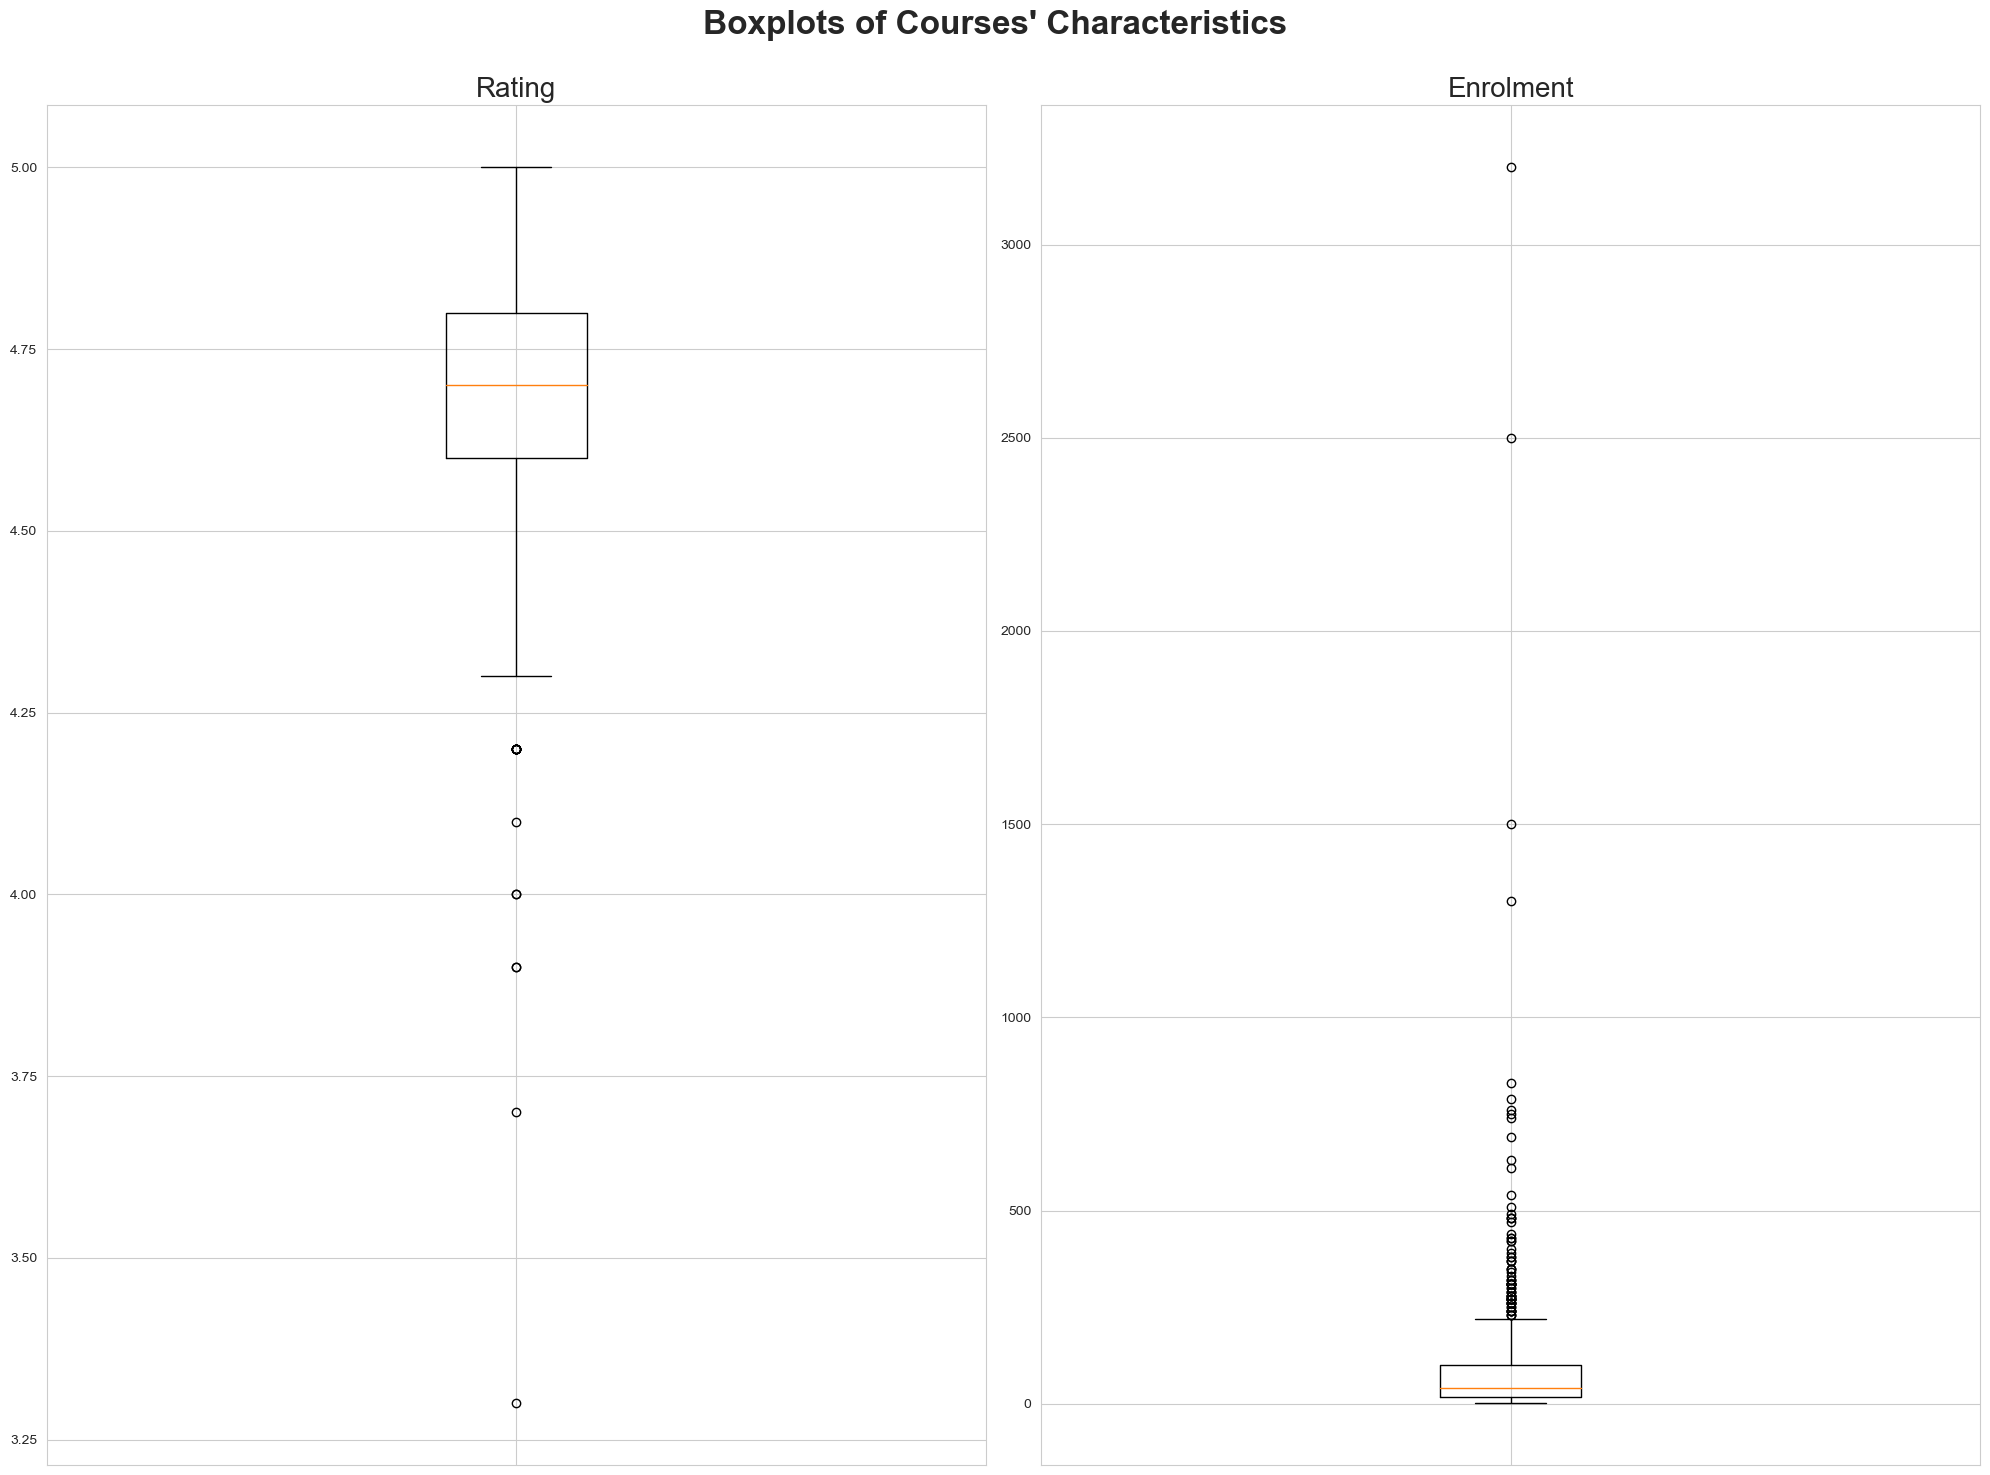

In [59]:
# TREATING OUTLIERS

# Boxplots of quantitative data
## Create a figure with subplots
n_cols = math.ceil(math.sqrt(len(columns_numeric)))
figure, axes = plt.subplots(
    ncols=n_cols,
    nrows=math.ceil(len(columns_numeric)/n_cols),
    dpi=100,
    figsize=(20, 15)
)
axes = axes.flatten()

## Plot a boxplot for each column
for i, col in enumerate(columns_numeric):
    axes[i].boxplot(DATA[col])
    axes[i].set_title(col, fontsize=20)
    axes[i].set_xticklabels([])

## Remove the last empty subplot, adjust layout and title
figure.suptitle(
    'Boxplots of Courses\' Characteristics\n',
    fontsize=24,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()
# figure.delaxes(axes[11])

## Display the plot
plt.show()


The boxplot analysis revealed that the students' ratings and enrolment quantities in the dataset have extreme values that deviate significantly from the rest of the data. Outliers can affect the statistical summary and inference of the data, so it is important to examine them carefully and understand their causes and implications.

In the following sections, I will explore each of these variables in more detail and discuss possible ways to handle the outliers.

In [60]:
# Closer look at Rating & Enrolment
## Columns with outliers according to the boxplots
columns_wOutliers = 'Rating, Enrolment'.split(', ')

## Loop through each column with outliers
for col in columns_wOutliers:
    ### Compute IQR and select columns of interest
    q1, q3 = DATA[col].quantile((.25, .75))
    IQRange = q3 - q1
    cols = ['Title','Organization', col]

    ### Select rows with values outside the IQR
    courses_sus = DATA[cols][(DATA[col] < q1 - 1.5 * IQRange) | (DATA[col] > q3 + 1.5 * IQRange)]

    ### Rearrange the 'outlier' rows based on data of interest
    courses_sus.sort_values(col, inplace=True, ascending=False)
    courses_sus.reset_index(drop=True, inplace=True)
    courses_sus.index += 1

    ### Display the outliers
    print(
        f"CHARACTERISTIC: {col.upper()}\n"
        f"{tabulate(courses_sus, tablefmt='simple')}\n"
        f"\n"
    )


CHARACTERISTIC: RATING
--  ---------------------------------------------------------------  ------------------------------------------  ---
 1  Unity XR: How to Build AR and VR Apps                            Unity                                       4.2
 2  Foundations of Marketing Analytics                               Emory University                            4.2
 3  Cybersecurity and Its Ten Domains                                University System of Georgia                4.2
 4  Hardware Description Languages for FPGA Design                   University of Colorado Boulder              4.2
 5  Project Execution                                                University of California, Irvine            4.2
 6  Introduction to Spreadsheets and Models                          University of Pennsylvania                  4.2
 7  Aprende a programar con Python                                   Universidad Austral                         4.2
 8  Mastering Data Analysis in Excel     

Ratings are subjective evaluations that reflect how much a person likes or dislikes a course, and number of participants are counts of how many people decided to join or participate in that course. These variables are not random or objective, but rather influenced by various factors that can vary across individuals and contexts.

One factor that can affect human-influenced variables is motivation. Different people may have different levels of motivation to provide ratings or to participate in something. For example, some people may rate a course only if they are extremely satisfied or dissatisfied with it, while others may rate it regardless of their experience. Similarly, some people may participate in it only if they are interested in the topic or incentivized by a reward, while others may participate out of curiosity or obligation. These differences in motivation can create outliers in the data, such as very high or low ratings or very large or small numbers of participants.

Another factor that can affect human-influenced variables is bias. Bias can affect how people rate or participate in something, regardless of its actual quality or value. For example, some people may rate a product higher or lower than it deserves because they have a positive or negative impression of the institutions (e.g., MIT) or subject. Similarly, some people may participate more or less in something because they have a favorable or unfavorable attitude towards the subject (e.g. Machine Learning), the researcher, or the purpose. These biases can create outliers in the data, such as inflated or deflated ratings or skewed numbers of participants.

Consequently, it is advisable to retain even the extreme, random/irregular observations regardless of the distribution of these human-influenced characteristics. Furthermore, a detailed analysis of these particular observations from these variables will be essential to consider during exploratory data analysis.

## Exploratory Data Analysis

### About the Difficulties
It is possible that the degree of difficulties of the courses can be considered an ordinal variable, and through
further simplification and assumptions, can be considered a ratio variable.

In [215]:
# Explode the 'Artist' column to consider songs with multiple artists
DATA_artists = DATA.explode('Artist')

# Create a new dataframe with the count of songs per artist
SongsCount_artists = pd.DataFrame(DATA_artists['Artist'].value_counts()).reset_index()

# Add and format the index & column labels
SongsCount_artists.index += 1
SongsCount_artists.index.name = 'Ranking'
SongsCount_artists.columns = ('Artist', 'Number of Songs')

# Display a table of the most popular artists
print('Most Popular Artists:\n'.upper())
print(tabulate(SongsCount_artists[SongsCount_artists['Number of Songs'] > 1], headers='keys', tablefmt='Simple'))


MOST POPULAR ARTISTS:

  Ranking  Artist           Number of Songs
---------  -------------  -----------------
        1  Billie Eilish                  3
        2  Dua Lipa                       3
        3  Travis Scott                   3
        4  Justin Bieber                  2
        5  Harry Styles                   2
        6  Lewis Capaldi                  2
        7  Post Malone                    2


Among the top 50 songs in 2020, there were only seven artists who have more than one popular track. These artists are
Billie Eilish, Dua Lipa, Travis Scott, Justin Bieber, Harry Styles, Lewis Capaldi, and Post Malone. They each have two or three songs in the top 50 list, which shows their dominance and influence in the music industry.

In [216]:
# Display the number of unique artists
artists = set().union(*DATA['Artist'])
print(f"{'Number of Artists in Top 50'.upper()}: {len(artists)} different artists.")


NUMBER OF ARTISTS IN TOP 50: 40 different artists.


Based on our preliminary analysis, we found that there were 40 different artists in the top 50 songs of 2020, which indicates a high level of diversity among the most streamed songs.

### About the Albums
One of the questions that we will address in this report is whether there are any albums that have more than one
popular track among the top 50 songs. We will also examine how many albums in total have their songs in the top 50, and what are the characteristics of these albums. By doing so, we will gain insights into the trends and preferences of Coursera users and listeners in 2020.


In [217]:
# Create a new dataframe with the count of songs per album
SongsCount_albums = pd.DataFrame(DATA_artists['Album'].value_counts()).reset_index()

# Add and format the index & column labels
SongsCount_albums.index += 1
SongsCount_albums.index.name = 'Ranking'
SongsCount_albums.columns = ('Album', 'Number of Songs')

# Display a table of the most popular albums
print('Most Popular Albums:\n'.upper())
print(tabulate(SongsCount_albums[SongsCount_albums['Number of Songs'] > 1], headers='keys', tablefmt='Simple'))


MOST POPULAR ALBUMS:

  Ranking  Album                   Number of Songs
---------  --------------------  -----------------
        1  Future Nostalgia                      3
        2  Hollywood's Bleeding                  2
        3  Fine Line                             2
        4  Changes                               2


According to the table, we found that there were four albums which are more popular than the others. They are the
following albums:
- Future Nostalgia by Dua Lipa, with three songs in the top 50: Don't Start Now, Break My Heart, and Physical.
- Hollywood's Bleeding by Post Malone, with two songs in the top 50: Circles and Sunflower (with Swae Lee).
- Fine Line by Harry Styles, with two songs in the top 50: Watermelon Sugar and Adore You.
- Changes by Justin Bieber, with two songs in the top 50: Intentions (with Quavo) and Yummy.


In [218]:
# Display the number of unique albums
albums = set(DATA['Album'])
print(f"{'Number of Albums in Top 50'.upper()}: {len(albums)} different albums.")


NUMBER OF ALBUMS IN TOP 50: 45 different albums.


Our preliminary findings again show that there are 45 different albums in the top 50 songs of 2020, which
indicates a high level of variety and creativity among the artists and genres that dominated the music scene.

### About the Danceability
In the next section of this report, we will analyze the danceability of the top 50 songs. Danceability is a measure of how suitable a track is for dancing based on a combination of musical elements such as tempo, rhythm stability, beat strength, and overall regularity. We will use a threshold of 0.7 to identify the tracks that have a high danceability score and a threshold of 0.4 to identify the tracks that have a low danceability score.


In [237]:
# Songs with Low & High Danceability Scores
## Characteristic of interest & confidence interval
col = 'Danceability'
lower, upper = 0.4, 0.7

## Sort the dataset based on the characteristic (from lowest to highest)
DATA_sorted = DATA.sort_values(col)
cols = ['Title','Artist',  'Genre', col]

## Select rows with danceability < 0.4
songs_lowScore = DATA_sorted[cols][DATA_sorted[col] < lower]

## Rearrange the rows starting from the lowest scores
songs_lowScore.reset_index(drop=True, inplace=True)
songs_lowScore.index += 1

## Display the low-danceability songs
print(
    f"{f'Low-{col} Songs: [< {lower}]'.upper()}\n"
    f"{tabulate(songs_lowScore, tablefmt='simple')}\n"
    f"\n"
)

## Select rows with danceability > 0.7
songs_highScore = DATA_sorted[cols][DATA_sorted[col] > upper].iloc[::-1]

## Rearrange the rows starting from the highest scores
songs_highScore.reset_index(drop=True, inplace=True)
songs_highScore.index += 1

## Display the high-danceability songs
print(
    f"{f'High-{col} Songs: [> {upper}]'.upper()}\n"
    f"{tabulate(songs_highScore, tablefmt='simple')}\n"
    f"\n"
)


LOW-DANCEABILITY SONGS: [< 0.4]
-  --------------------  -----------------  ---------------  -----
1  lovely (with Khalid)  {'Billie Eilish'}  {'Chamber pop'}  0.351
-  --------------------  -----------------  ---------------  -----


HIGH-DANCEABILITY SONGS: [> 0.7]
--  ---------------------------------------------  -------------------  ------------------------------  -----
 1  WAP (feat. Megan Thee Stallion)                {'Cardi B'}          {'Hip-Hop', 'Trap'}             0.935
 2  The Box                                        {'Roddy Ricch'}      {'Hip-Hop', 'Rap'}              0.896
 3  Ride It                                        {'Regard'}           {'Dance', 'Electronic'}         0.88
 4  Sunday Best                                    {'Surfaces'}         {' Electro-pop'}                0.878
 5  Supalonely (feat. Gus Dapperton)               {'BENEE'}            {'Alternative', 'Indie'}        0.862
 6  goosebumps                                     {'Travis Scott'}     {

According to the data, only one song out of the top 50 has a low danceability score: lovely (with Khalid) by Billie Eilish, with a score of 0.351. This song is a slow and melancholic ballad that features soft vocals and minimal instrumentation.

On the other hand, 32 songs out of the top 50 have a high danceability score (above 0.7). These songs are mostly
upbeat and energetic, with catchy rhythms and strong beats. They belong to various genres such as hip-hop, trap,
rap, pop, and electronic. The top three songs with the highest danceability scores are: WAP (feat. Megan Thee
Stallion) by Cardi B, with a score of 0.935; The Box by Roddy Ricch, with a score of 0.896; and Ride It by Regard, with a score of 0.88.

### About the Loudness


In [238]:
# Songs with Low & High Loudness Scores
## Characteristic of interest & confidence interval
col = 'Loudness'
lower, upper = -8, -5

## Sort the dataset based on the characteristic (from lowest to highest)
DATA_sorted = DATA.sort_values(col)
cols = ['Title','Artist',  'Genre', col]

## Select rows with loudness < -8
songs_lowScore = DATA_sorted[cols][DATA_sorted[col] < lower]

## Rearrange the rows starting from the lowest scores
songs_lowScore.reset_index(drop=True, inplace=True)
songs_lowScore.index += 1

## Display the quietest songs
print(
    f"{f'Low-{col} Songs: [< {lower}]'.upper()}\n"
    f"{tabulate(songs_lowScore, tablefmt='simple')}\n"
    f"\n"
)

## Select rows with loudness > -5
songs_highScore = DATA_sorted[cols][DATA_sorted[col] > upper].iloc[::-1]

## Rearrange the rows starting from the highest scores
songs_highScore.reset_index(drop=True, inplace=True)
songs_highScore.index += 1

## Display the loudest songs
print(
    f"{f'High-{col} Songs: [> {upper}]'.upper()}\n"
    f"{tabulate(songs_highScore, tablefmt='simple')}\n"
    f"\n"
)


LOW-LOUDNESS SONGS: [< -8]
-  ----------------------------------------------  -----------------  ------------------------------  -------
1  everything i wanted                             {'Billie Eilish'}  {'Pop'}                         -14.454
2  bad guy                                         {'Billie Eilish'}  {' Electro-pop'}                -10.965
3  lovely (with Khalid)                            {'Billie Eilish'}  {'Chamber pop'}                 -10.109
4  If the World Was Ending - feat. Julia Michaels  {'JP Saxe'}        {'Pop'}                         -10.086
5  Toosie Slide                                    {'Drake'}          {'Hip-Hop', 'Rap'}               -8.82
6  death bed (coffee for your head)                {'Powfu'}          {'Hip-Hop', 'Rap'}               -8.765
7  HIGHEST IN THE ROOM                             {'Travis Scott'}   {'Hip-Hop', 'Rap'}               -8.764
8  Falling                                         {'Trevor Daniel'}  {'R&B', 'Hip-Hop alterna

According to the data, there are 9 songs with low loudness ranging from -14.454 LUFS to -8.52 LUFS. The top 3
songs with the lowest loudness, in which all come from the same artist, are: everything i wanted by Billie Eilish
(Pop) with -14.454 LUFS; bad guy by Billie Eilish (Electro-pop) with -10.965 LUFS; lovely (with Khalid) by Billie
Eilish (Chamber pop) with -10.109 LUFS.

These songs are characterized by a minimalist production style that relies on sparse instrumentation, soft vocals,
 and subtle dynamics.  Billie Eilish is known for her innovative and unconventional approach to pop music, which
 challenges the norms of mainstream music production. This further characterizes her unique style of music
 regardless of her involvement in a wide variety of genres.

On the other hand, there are 19 songs with high loudness ranging from -4.858 LUFS to -3.28 LUFS. The top 3 songs with the highest loudness are: Tusa by KAROL G with -3.28 LUFS; goosebumps by Travis Scott with -3.37 LUFS; Break My Heart by Dua Lipa with -3.434 LUFS.

These songs are characterized by a dense production style that relies on heavy instrumentation, powerful vocals, and compressed dynamics.  These genres are influenced by the loudness war and aim to achieve maximum impact and attention from listeners.

### About the Duration
The next questions we will answer is: which track is the longest and which track is the shortest among the top 50
songs in 2020? This will help us understand how song length affects listener preference and attention span.

In [255]:
# Songs with Low & High Loudness Scores
## Characteristic of interest & confidence interval
col = 'Duration'

## Sort the dataset based on the characteristic (from lowest to highest)
DATA_sorted = DATA.sort_values(col)
cols = ['Title','Artist',  'Genre', col]

## Select row with the shortest duration
songs_lowScore = DATA_sorted[cols].iloc[0:1]

## Rearrange the rows starting from the lowest scores
songs_lowScore.reset_index(drop=True, inplace=True)
songs_lowScore.index += 1

## Display the shortest song
print(
    f"{f'Shortest Song:'.upper()}\n"
    f"{tabulate(songs_lowScore, tablefmt='simple')}\n"
    f"\n"
)

## Select row with the longest duration
songs_highScore = DATA_sorted[cols].iloc[-1:]

## Rearrange the rows starting from the highest scores
songs_highScore.reset_index(drop=True, inplace=True)
songs_highScore.index += 1

## Display the longest song
print(
    f"{f'Longest Song:'.upper()}\n"
    f"{tabulate(songs_highScore, tablefmt='simple')}\n"
    f"\n"
)


SHORTEST SONG:
-  ----------------------  ------------  -----------  ------
1  Mood (feat. iann dior)  {'24kGoldn'}  {'Pop rap'}  140526
-  ----------------------  ------------  -----------  ------


LONGEST SONG:
-  ----------  ----------------  ------------------  ------
1  SICKO MODE  {'Travis Scott'}  {'Hip-Hop', 'Rap'}  312820
-  ----------  ----------------  ------------------  ------




According to the data, the shortest song among the top 50 songs in 2020 is Mood (feat. iann dior) by 24kGoldn,
which has a duration of 2 minutes and 20 seconds. The longest song among the top 50 songs in 2020 is SICKO MODE by
Travis Scott, which has a duration of 5 minutes and 12 seconds. The difference between the shortest and the longest
song is 172294 milliseconds, which is equivalent to about 2 minutes and 52 seconds.


### About the Genres
 I will now analyze the genre distribution of the top 50 songs. I will answer the following questions: Which genre
  is the most popular? Which genres have just one song on the top 50? And finally, how many genres in total are
  represented in the top 50?

In [357]:
# Explode the 'Artist' column to consider songs of multiple genres
DATA_genres = DATA.explode('Genre')

# Create a new dataframe with the count of songs per genre
SongsCount_genres = pd.DataFrame(DATA_genres['Genre'].value_counts()).reset_index()

# Add and format the index & column labels
SongsCount_genres.index += 1
SongsCount_genres.index.name = 'Ranking'
SongsCount_genres.columns = ('Genre', 'Number of Songs')

# Retrieve genres with more than 4 songs
PopularGenres = SongsCount_genres[SongsCount_genres['Number of Songs'] >= 4]

# Display a table of the most popular genres
print('Most Popular Genres:\n'.upper())
print(tabulate(PopularGenres, headers='keys', tablefmt='Simple'))



MOST POPULAR GENRES:

  Ranking  Genre          Number of Songs
---------  -----------  -----------------
        1  Hip-Hop                     15
        2  Pop                         15
        3  Rap                         13
        4  Alternative                  5
        5  Dance                        5
        6  Electronic                   5
        7  Indie                        4
        8  R&B                          4


In [263]:
# Display a table of the genres with just one song
print('Genres with One Song:\n'.upper())
print(tabulate(SongsCount_genres[SongsCount_genres['Number of Songs'] == 1], headers='keys', tablefmt='Simple'))


GENRES WITH ONE SONG:

  Ranking  Genre                  Number of Songs
---------  -------------------  -----------------
       11  Dance-pop                            1
       12  experimental                         1
       13  reggaeton                            1
       14  Dreampop                             1
       15  Disco-pop                            1
       16  Soft Rock                            1
       17  Disco                                1
       18  Trap                                 1
       19  Pop rap                              1
       20  Hip-Hop alternative                  1
       21  Nu-disco                             1
       22  Chamber pop                          1


According to Coursera's official playlists , the most popular genre in 2020 was Hip-Hop, with 15 songs on the top
50 list, followed Pop, also with 15 songs. The third most popular genre was Rap, with 13 songs. These three genres accounted for more than 80% of the top 50 songs.

On the other hand, the genres that have just one song on the top 50 are dance-pop, experimental, reggaeton,
dreampop, disco-pop, soft rock, disco, trap, pop rap, hip-hop alternative, nu-disco, and chamber pop. These genres
 have a variety of musical styles and influences. They may have a niche audience but yet a higher streaming rate
 compared to more mainstream genres. For instance, Don't Start Now by Dua Lipa has very niche genre (nu disco)
 and yet still reached in the top 10. On the other hand, even though Falling by Trevor Daniel has a 'niche' genre
 called "Hip-Hop alternative", it is in fact just a combination of the 2 most popular genres - hip-hop and
 alternative.


In [266]:
# Display the number of unique genres
genres = set().union(*DATA['Genre'])
print(f"{'Number of Genres in Top 50'.upper()}: {len(genres)} different genres.")


NUMBER OF GENRES IN TOP 50: 22 different genres.


Overall, there were 22 different genres represented in the list, ranging from pop and rock to country and disco.

### Further Analysis on Popular Genres
Forllowing our exploration of the genres, we will now compare the danceability, loudness, and acousticness scores
across the eight most popular genres: Pop, Hip-Hop, Rap, Dance, Electronic, Alternative, Indie, and R&B. These
genres have already been shown to have influenced much of the most popular songs, therefore, it is sensible to
explore the characteristics and trends of the most popular songs across these genres to comprehend the factors
that make up a certain genre.


In [369]:
# Set of popular genres
popularGenres = set(PopularGenres['Genre'])

# Characteristic to examine
col = 'Danceability'

# Dataset with the relevant columns and only including the popular genres
DATA_DanceGenre = DATA_genres[[col, 'Genre']][DATA_genres['Genre'].isin(popularGenres)].reset_index(drop=True)

# Display the descriptive statistics
print(
        f"CHARACTERISTIC: {col.upper()}\n"
        f"----------------{'-'*len(col)}"
)
DATA_DanceGenre.groupby('Genre').describe().T


CHARACTERISTIC: DANCEABILITY
----------------------------


Genre               Alternative     Dance  Electronic    Hip-Hop     Indie  \
Danceability count     5.000000  5.000000    5.000000  15.000000  4.000000   
             mean      0.650800  0.755000    0.755000   0.776133  0.661750   
             std       0.184456  0.094744    0.094744   0.090556  0.211107   
             min       0.459000  0.647000    0.647000   0.598000  0.459000   
             25%       0.501000  0.674000    0.674000   0.736000  0.490500   
             50%       0.607000  0.785000    0.785000   0.774000  0.663000   
             75%       0.825000  0.789000    0.789000   0.832000  0.834250   
             max       0.862000  0.880000    0.880000   0.935000  0.862000   

Genre                     Pop       R&B        Rap  
Danceability count  15.000000  4.000000  13.000000  
             mean    0.678733  0.710000   0.765538  
             std     0.105952  0.131461   0.085470  
             min     0.464000  0.514000   0.598000  
             25%     0.634500  0.694750   0.726000  
             50%     0.695000  0.769500   0.774000  
             75%     0.761500  0.784750   0.830000  
             max     0.806000  0.787000   0.896000

From the obtained results, it can be seen that all the popular genres generally have high danceability scores,
ranging from 0.662 to 0.766. Hip-Hop, Rap, Dance, and Electronic have the highest score, indicating that these
genres are more likely to make people move and enjoy the music.


In [376]:
# Characteristic to examine
col = 'Loudness'

# Dataset with the relevant columns and only including the popular genres
DATA_DanceGenre = DATA_genres[[col, 'Genre']][DATA_genres['Genre'].isin(popularGenres)].reset_index(drop=True)

# Display the descriptive statistics
print(
        f"CHARACTERISTIC: {col.upper()}\n"
        f"----------------{'-'*len(col)}"
)
DATA_DanceGenre.groupby('Genre').describe().T


CHARACTERISTIC: LOUDNESS
------------------------
                         Alternative     Dance    Electronic    Hip-Hop      Indie        Pop       R&B       Rap
---------------------  -------------  --------  ------------  ---------  ---------  ---------  --------  --------
('Loudness', 'count')       5          5             5         15         4          15         4        13
('Loudness', 'mean')       -5.1516    -5.338        -5.338     -6.78727  -5.421      -6.2628   -5.90875  -6.91785
('Loudness', 'std')         0.901538   1.47905       1.47905    1.88116   0.774502    3.00372   2.02113   1.89181
('Loudness', 'min')        -6.401     -7.567        -7.567     -8.82     -6.401     -14.454    -8.756    -8.82
('Loudness', '25%')        -5.679     -5.652        -5.652     -8.238    -5.8595     -7.1485   -6.6395   -8.52
('Loudness', '50%')        -4.858     -5.457        -5.457     -7.509    -5.2685     -6.637    -5.2555   -7.648
('Loudness', '75%')        -4.746     -4.258        

We can see that Hip-Hop and Rap have the lowest mean loudness values, indicating that songs in these genres tend
to be louder than those in the other genres. Pop and R&B have the highest standard deviations, indicating a
greater range of loudness values within these genres. Indie has the highest minimum value, which means that even
the quietest songs in Indie are still relatively loud. Furthermore, the standard deviation of "Loudness" values
for each genre varies widely, with the highest standard deviation found in the "Pop" genre at 3.00372, while the lowest standard deviation is found in the "Indie" genre at 0.774502.

In [377]:
# Characteristic to examine
col = 'Acousticness'

# Dataset with the relevant columns and only including the popular genres
DATA_DanceGenre = DATA_genres[[col, 'Genre']][DATA_genres['Genre'].isin(popularGenres)].reset_index(drop=True)

# Display the descriptive statistics
print(
        f"CHARACTERISTIC: {col.upper()}\n"
        f"----------------{'-'*len(col)}"
)
DATA_DanceGenre.groupby('Genre').describe().T


CHARACTERISTIC: ACOUSTICNESS
----------------------------
                             Alternative      Dance    Electronic    Hip-Hop     Indie        Pop       R&B        Rap
-------------------------  -------------  ---------  ------------  ---------  --------  ---------  --------  ---------
('Acousticness', 'count')       5         5             5          15         4         15         4         13
('Acousticness', 'mean')        0.46886   0.09944       0.09944     0.200402  0.5835     0.315053  0.228365   0.188741
('Acousticness', 'std')         0.311368  0.0958281     0.0958281   0.20037   0.204086   0.308454  0.228147   0.186396
('Acousticness', 'min')         0.0103    0.0137        0.0137      0.00513   0.291      0.021     0.00146    0.00513
('Acousticness', '25%')         0.291     0.0149        0.0149      0.0608    0.52575    0.0806    0.092615   0.067
('Acousticness', '50%')         0.604     0.0686        0.0686      0.145     0.646      0.223     0.1895     0.145
('Ac

Looking at the statistics, we can see that the 'Acousticness' values vary widely across different genres. For
example, Indie songs tend to have a much higher 'Acousticness' value than Dance or Electronic songs. Similarly,
on the lower end of the spectrum, Hip-Hop songs have a higher 'Acousticness' value compared to Rap songs. These
differences in 'Acousticness' values could be used to identify and classify songs into different genres based on their acoustic characteristics.

For instance, if we consider the Alternative and Pop genres, which have similar mean values of 'Acousticness', we
can use the 'std' row to see that Pop songs have a higher standard deviation, indicating that there is more
variability in the 'Acousticness' values for Pop songs compared to Alternative songs. This information could be
used to create a more refined classification system for songs based on their acoustic characteristics. On the
other hand, it also indicates the extensibility and variety of pop music in terms of acoustic range.

### Correlations
In the next section, we will analyze the correlation between different features. We will use a correlation matrix and a heatmap to visualize the strength and direction of the relationships between the features.

We will also identify which features are strongly positively correlated; which features are strongly negatively correlated; and which features are not correlated, meaning that they have no linear relationship with each other. This analysis will help us understand the patterns and trends in the data and generate insights for further exploration.


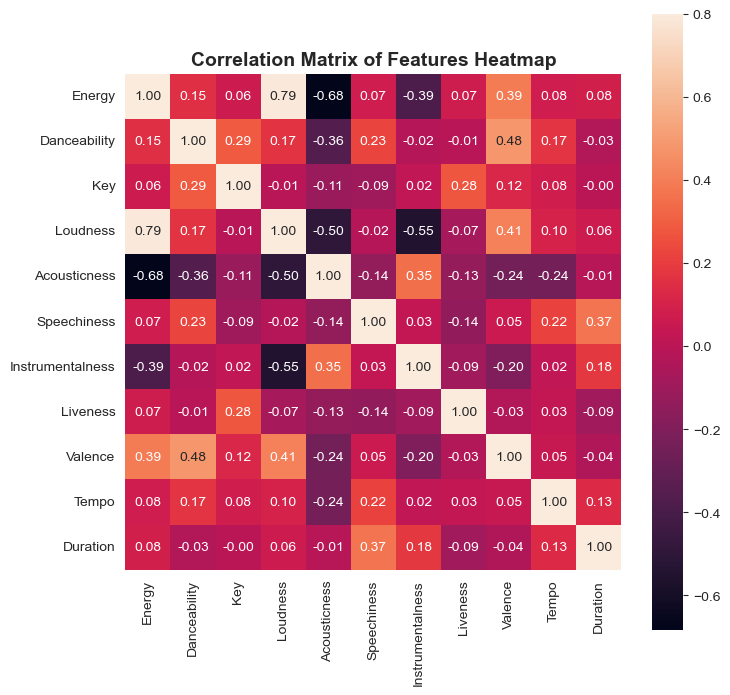

In [343]:
# Heatmap that represents the correlation matrix of the numeric data
## Create a square figure
figure = plt.figure(figsize=(8, 8))

## Correlations of numerical features
Correlations = DATA[columns_numeric].corr()
Correlations_triu = Correlations.where(np.triu(np.ones(Correlations.shape), k=1).astype(bool))

## Create heatmap
sns.heatmap(
    Correlations,
    vmax=.8,
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 10}
)

# Format plot's details (title)
plt.title('Correlation Matrix of Features Heatmap', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Display the plot
plt.show()


The heatmap indicates a strong positive correlation between Energy and Loudness (0.79) and the negative
correlations between Energy and Acousticness, and Loudness and Instrumentalness. Let's investigate the
relationships more precisely.

In [350]:
# Select positive correlations > 0.5
Correlations_pos = Correlations_triu[Correlations > 0.5].stack().reset_index()
Correlations_pos.index += 1

# Display table of features with highly positive correlations
print('Highly positive Correlations:'.upper())
print(tabulate(Correlations_pos, tablefmt='Simple'))


HIGHLY POSITIVE CORRELATIONS:
-  ------  --------  -------
1  Energy  Loudness  0.79164
-  ------  --------  -------


In [354]:
# Select negative correlations < -0.5
Correlations_neg = Correlations_triu[Correlations < -0.5].stack().reset_index()
Correlations_neg.index += 1

# Display table of features with highly negative correlations
print('Highly negative Correlations:'.upper())
print(tabulate(Correlations_neg, tablefmt='Simple'))


HIGHLY NEGATIVE CORRELATIONS:
-  --------  ----------------  ---------
1  Energy    Acousticness      -0.682479
2  Loudness  Instrumentalness  -0.553735
-  --------  ----------------  ---------


In [348]:
# Select low correlations from -0.05 to 0.05
Correlations_non = Correlations_triu[(-0.05 < Correlations) & (Correlations < 0.05)].stack().reset_index()
Correlations_non.index += 1

# Display table of likely uncorrelated features
print('Low Correlations:'.upper())
print(tabulate(Correlations_non, tablefmt='Simple'))


LOW CORRELATIONS:
--  ----------------  ----------------  -----------
 1  Danceability      Instrumentalness  -0.0177064
 2  Danceability      Liveness          -0.00664848
 3  Danceability      Duration          -0.0337635
 4  Key               Loudness          -0.00917841
 5  Key               Instrumentalness   0.0208024
 6  Key               Duration          -0.0033453
 7  Loudness          Speechiness       -0.0216929
 8  Acousticness      Duration          -0.0109881
 9  Speechiness       Instrumentalness   0.028948
10  Instrumentalness  Tempo              0.0188527
11  Liveness          Valence           -0.0333663
12  Liveness          Tempo              0.0254567
13  Valence           Tempo              0.0450887
14  Valence           Duration          -0.0397944
--  ----------------  ----------------  -----------


One of the key findings of the analysis is that there are strong positive correlations between energy and loudness,
and strong negative correlations between energy and acousticness, and loudness and instrumentalness. This means
that the songs with higher energy tend to be louder, while the songs with lower energy tend to be more acoustic
and instrumental.

Hence, we can infer that there is a notable positive relationship and similarities between songs
that have high energy and those that have loud noise; more specifically, because there only exists a mildly
positive relationship between acousticness and instrumentalness, 'energizing' songs tend to not be acoustic,
whereas 'loud' songs tend to not be instrumental.

On the other hand, there are very low correlations between fourteen distinct pairs of features. This means that
these features are largely independent of each other and do not have much influence on the other characteristics the
songs.

### Suggestions for Future Improvement
The project also had some significant limitations that affected the validity and generalizability of the results. The main limitation was the very low number of observations, which made it difficult to draw any meaningful conclusions or infer any causal relationships. Another limitation was that the values in most categorical variables only had 1 to 4 observations, which made it useless to investigate further into the effect of different categories. Moreover, the numerical data were also too general and did not reflect directly the reasons for the songs' popularity.

Therefore, for future improvement, it is suggested that a larger and more representative sample should be obtained, for instance, taking the top 1000 songs as the observations. Additionally, the lyrics should also be analyzed using sentiment analysis to examine how they relate to the mood and emotions of the listeners. These steps would help to gain more insights into the factors that influence the popularity of songs on Coursera.

Furthermore, the project could include more data sources such as YouTube views, social media engagement, and
billboard rankings to measure the popularity of the songs. The project could also use more advanced machine learning models such as neural networks or natural language processing to classify the songs into genres or to generate song lyrics. The project could also investigate the temporal trends of the songs and how they change over time.


Additionally, it would be interesting to explore the impact of different features on the popularity of songs across different countries or regions. For instance, analyzing the differences between the top songs in the US versus those in Europe or Asia could provide valuable insights into the cultural and musical preferences of different audiences.

Another potential avenue for future research is to investigate the relationship between the popularity of songs and the streaming habits of users. This could involve analyzing user data to identify patterns in the types of songs that are streamed most frequently, as well as examining the impact of different features such as the length of the song or the tempo on user behavior.